In [2]:
%store -r

Build your model. You can use any model you wish, so long as you explain your choice. However, if you are not sure what to do, we recommend building a fuzzy logic model (see below).

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def calculate_suitability_score(raster, optimal_value, tolerance_range):
    """
    Calculate a fuzzy suitability score (0-1) for each raster cell based on proximity to the optimal value.

    Args:
        raster (xarray.DataArray): Input raster layer.
        optimal_value (float): The optimal value for the variable.
        tolerance_range (float): The range within which values are considered suitable.

    Returns:
        xarray.DataArray: A raster of suitability scores (0-1).
    """
    # Calculate suitability scores using a fuzzy Gaussian function
    suitability = np.exp(-((raster - optimal_value) ** 2) / (2 * tolerance_range ** 2))
    return suitability


In [5]:
def build_habitat_suitability_model(input_rasters, optimal_values, tolerance_ranges,):
    """
    Build a habitat suitability model by combining fuzzy suitability scores for each variable.

    Args:
        input_rasters (list): List of paths to input raster files representing environmental variables.
        optimal_values (list): List of optimal values for each variable.
        tolerance_ranges (list): List of tolerance ranges for each variable.

    Returns:
        xarray.Datarray: A raster of combined suitability scores (0-1)
    """

    # Load and calculate suitability scores for each raster
    suitability_layers = []
    for raster, optimal_value, tolerance_range in zip(input_rasters, optimal_values, tolerance_ranges):
        suitability_layer = calculate_suitability_score(raster, optimal_value, tolerance_range)
        suitability_layers.append(suitability_layer)

    # Combine suitability scores by multiplying across all layers
    combined_suitability = suitability_layers[0]
    for layer in suitability_layers[1:]:
        combined_suitability *= layer

    return combined_suitability

In [6]:
optimal_values = [4.95, 0, 1105]
tolerance_ranges = [0.75, 40, 292]

Ideally, I would be able to loop through the rows of the forest DataFrame and build the model for each scenario. But this method may be unreliable.
It worked at the end of my analysis but I've left the hard-coded versions commented out and minimized in the event that the loop does not work.

In [16]:
model_list = []

for i in range(len(forest_df)):
    rasters = [
        forest_df['soil_da'][i],
        forest_df['slope_da'][i],
        forest_df['climate_da'][i]
    ]
    model = build_habitat_suitability_model(
        rasters,
        optimal_values,
        tolerance_ranges
    )
    model_list.append(model)

In [7]:
# GWNF_45_df = forest_df[
#     ((forest_df.site_name == 'George Washington National Forest') 
#      & (forest_df.climate_scenario =='rcp45'))]
# GWNF_45_rasters = [
#     GWNF_45_df.soil_da[0],
#     GWNF_45_df.slope_da[0],
#     GWNF_45_df.climate_da[0]
# ]

# GWNF_45_model = build_habitat_suitability_model(
#     GWNF_45_rasters,
#     optimal_values,
#     tolerance_ranges)

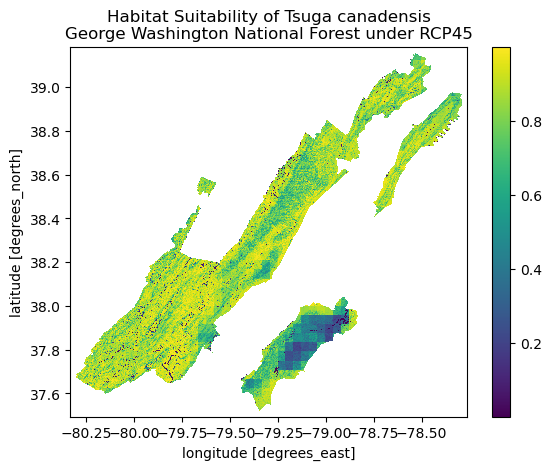

In [21]:
GWNF_45_model = model_list[0]
GWNF_45_model.plot()
plt.title("Habitat Suitability of Tsuga canadensis\nGeorge Washington National Forest under RCP45")
plt.savefig('TSCA_GWNF_RCP45.jpg')
plt.show()

In [9]:
# GWNF_85_df = forest_df[
#     ((forest_df.site_name == 'George Washington National Forest') 
#      & (forest_df.climate_scenario =='rcp85'))]
# GWNF_85_rasters = [
#     GWNF_85_df['soil_da'][1],
#     GWNF_85_df['slope_da'][1],
#     GWNF_85_df['climate_da'][1]
# ]

# GWNF_85_model = build_habitat_suitability_model(
#     GWNF_85_rasters,
#     optimal_values,
#     tolerance_ranges)

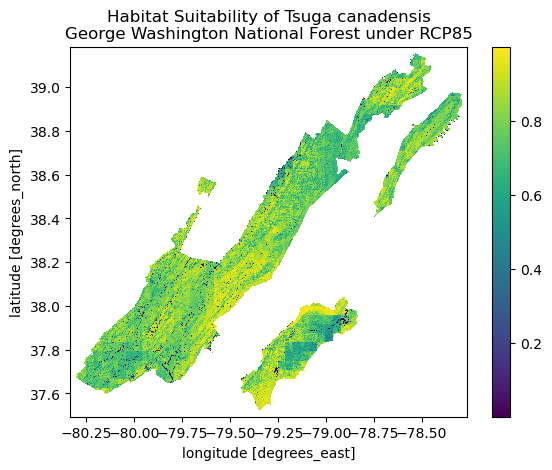

In [22]:
GWNF_85_model = model_list[1]
GWNF_85_model.plot()
plt.title("Habitat Suitability of Tsuga canadensis\nGeorge Washington National Forest under RCP85")
plt.savefig('TSCA_GWNF_RCP85.jpg')
plt.show()

In [ ]:
# JNF_45_df = forest_df[
#     ((forest_df.site_name == 'Jefferson National Forest') 
#      & (forest_df.climate_scenario =='rcp45'))]
# JNF_45_rasters = [
#     JNF_45_df['soil_da'][2],
#     JNF_45_df['slope_da'][2],
#     JNF_45_df['climate_da'][2]
# ]

# JNF_45_model = build_habitat_suitability_model(
#     JNF_45_rasters,
#     optimal_values,
#     tolerance_ranges)

Unfortunately, the Jefferson National Forest Models do not display properly currently because a DataArray of George Washington National Forest was used to harmonized all DataArrays. This is likely why only the furthest North East area displays, as it fits in next to George Washington National Forest.

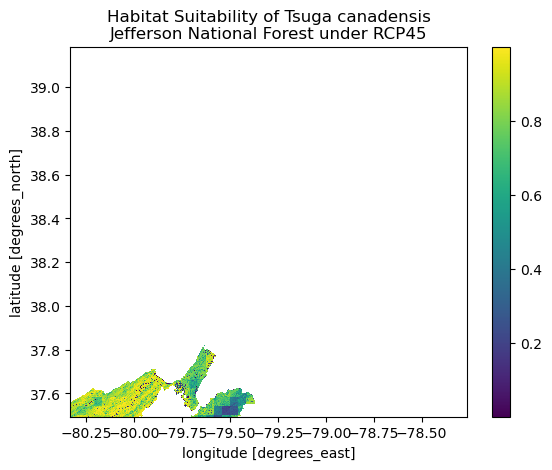

In [23]:
JNF_45_model = model_list[2]
JNF_45_model.plot()
plt.title("Habitat Suitability of Tsuga canadensis\nJefferson National Forest under RCP45")
plt.savefig('TSCA_JNF_RCP45.jpg')
plt.show()

In [14]:
# JNF_85_df = forest_df[
#     ((forest_df.site_name == 'Jefferson National Forest') 
#      & (forest_df.climate_scenario =='rcp85'))]
# JNF_85_rasters = [
#     JNF_85_df['soil_da'][3],
#     JNF_85_df['slope_da'][3],
#     JNF_85_df['climate_da'][3]
# ]

# JNF_85_model = build_habitat_suitability_model(
#     JNF_85_rasters,
#     optimal_values,
#     tolerance_ranges)

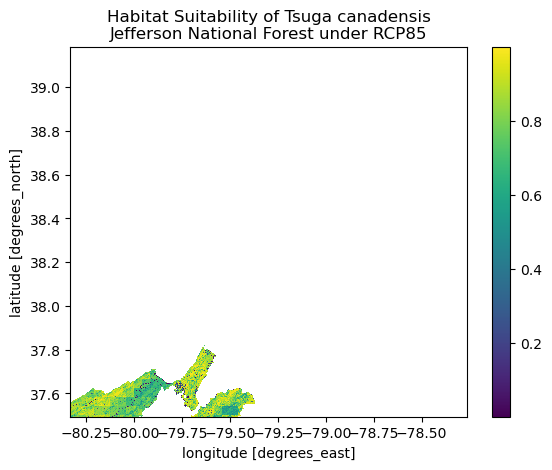

In [24]:
JNF_85_model = model_list[3]
JNF_85_model.plot()
plt.title("Habitat Suitability of Tsuga canadensis\nJefferson National Forest under RCP85")
plt.savefig('TSCA_JNF_RCP85.jpg')
plt.show()